# Vazão média de tempo seco em cada dia da semana

In [1]:
import pandas as pd
from babel.dates import format_datetime
import matplotlib.pyplot as plt

In [2]:
# Dados de entrada
pasta = "C:\\ENS\\LAUTEC"
ponte = pd.read_excel(pasta+'\\Outputs\\vazoes_tempo_seco.xlsx',
                      sheet_name='Ponte',
                      usecols=[0,1]).set_index('Data')
rendeiras = pd.read_excel(pasta+'\\Outputs\\vazoes_tempo_seco.xlsx',
                          sheet_name='Rendeiras',
                          usecols=[0,1]).set_index('Data') 

In [3]:
# Coluna com o dia da semana
ponte['Dia da semana'] = ponte.index.to_series().apply(lambda x: format_datetime(x, 'EEEE', locale='pt_BR'))
rendeiras['Dia da semana'] = rendeiras.index.to_series().apply(lambda x: format_datetime(x, 'EEEE', locale='pt_BR'))

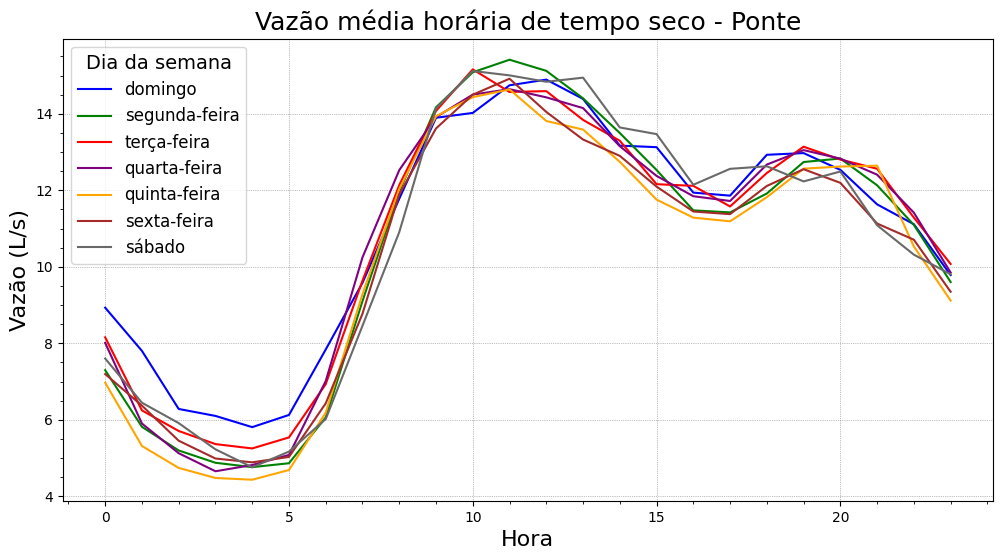

In [4]:
dias = ['domingo', 'segunda-feira', 'terça-feira', 
        'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado']
cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'dimgrey']
#marcadores = ['o', 's', 'D', '^', 'v', 'P', '*']

# Lista para armazenar os dataframes parciais
dfs = [] 

# Criar o gráfico - Ponte
fig, ax = plt.subplots(figsize=(12, 6))

#for dia, cor, marcador in zip(dias, cores, marcadores):
for dia, cor in zip(dias, cores):
    # Filtrar os dados para o dia atual
    aux = ponte[ponte['Dia da semana'] == dia].copy()
    aux['Hora'] = aux.index.hour
    aux = aux.groupby('Hora')['Vazão (L/s)'].mean()
    
    # Adicionar os dados ao gráfico
    ax.plot(aux.index, aux.values, 
            label=dia, 
            color=cor, 
            #marker=marcador, 
            linestyle='-')

    # Criar dataframe parcial e adicionar à lista
    df_parcial = pd.DataFrame({
        'Hora': aux.index,
        'Vazão (L/s)': aux.values,
        'Dia da semana': dia 
    })
    dfs.append(df_parcial)

# Concatenar todos os dataframes em um único dataframe final
df_final_ponte = pd.concat(dfs, ignore_index=True)

# Título, rótulos e legenda
ax.set_title('Vazão média horária de tempo seco - Ponte', fontsize=18)
ax.set_xlabel('Hora', fontsize=16)
ax.set_ylabel('Vazão (L/s)', fontsize=16)
ax.legend(title='Dia da semana', fontsize=12, title_fontsize=14)
ax.grid(True, which='major', color='gray', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Salvar o gráfico
plt.savefig(f'{pasta}\\Outputs\\semana_ponte.png', bbox_inches='tight') 

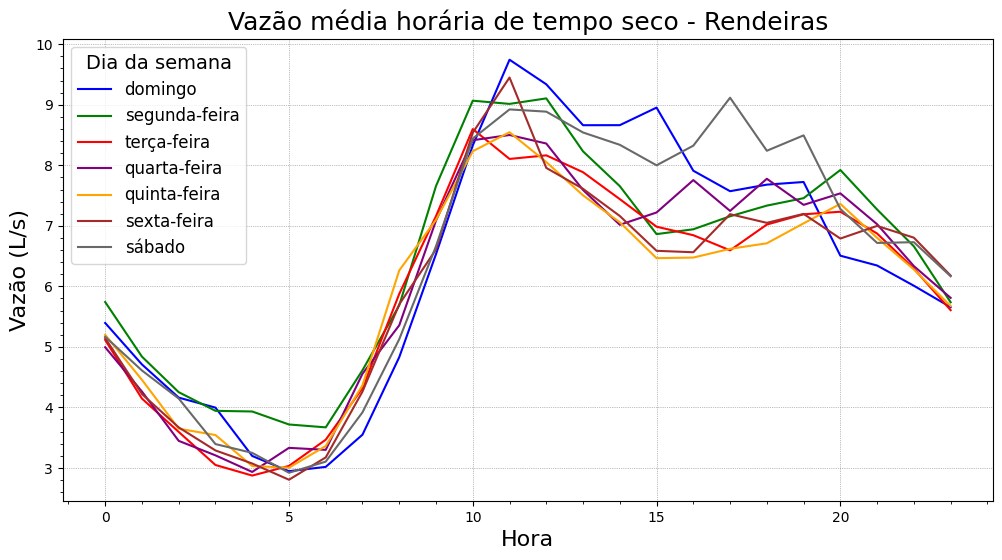

In [5]:
# Lista para armazenar os dataframes parciais
dfs = [] 

# Criar o gráfico - Rendeiras
fig, ax = plt.subplots(figsize=(12, 6))

#for dia, cor, marcador in zip(dias, cores, marcadores):
for dia, cor in zip(dias, cores):    
    # Filtrar os dados para o dia atual
    aux = rendeiras[rendeiras['Dia da semana'] == dia].copy()
    aux['Hora'] = aux.index.hour
    aux = aux.groupby('Hora')['Vazão (L/s)'].mean()
    
    # Adicionar os dados ao gráfico
    ax.plot(aux.index, aux.values, 
            label=dia, 
            color=cor, 
            #marker=marcador, 
            linestyle='-')

    # Criar dataframe parcial e adicionar à lista
    df_parcial = pd.DataFrame({
        'Hora': aux.index,
        'Vazão (L/s)': aux.values,
        'Dia da semana': dia 
    })
    dfs.append(df_parcial)

# Concatenar todos os dataframes em um único dataframe final
df_final_rend = pd.concat(dfs, ignore_index=True)

# Título, rótulos e legenda
ax.set_title('Vazão média horária de tempo seco - Rendeiras', fontsize=18)
ax.set_xlabel('Hora', fontsize=16)
ax.set_ylabel('Vazão (L/s)', fontsize=16)
ax.legend(title='Dia da semana', fontsize=12, title_fontsize=14)
ax.grid(True, which='major', color='gray', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Salvar o gráfico
plt.savefig(f'{pasta}\\Outputs\\semana_rendeiras.png', bbox_inches='tight') 

In [6]:
# Salvar planilha
with pd.ExcelWriter(pasta+'\\Outputs\\medias_horarias_semana.xlsx') as writer:
    df_final_ponte.to_excel(writer, sheet_name='Ponte')
    df_final_rend.to_excel(writer, sheet_name='Rendeiras') 